# <center>Predict whether the Employee of an Organization should get Promotion or Not?</center>
&nbsp;
Your client is a large MNC and they have 9 broad verticals across the organisation. One of the problem your client is facing is around identifying the right people for promotion (only for manager position and below) and prepare them in time. Currently the process, they are following is:
    * They first identify a set of employees based on recommendations/ past performance.
    * Selected employees go through the separate training and evaluation program for each vertical. These programs are based on he required skill of each vertical
    * At the end of the program, based on various factors such as training performance, an employee gets the promotion

# Importing all the Required Libraries

* We Import Numpy, Pandas, Matplot, and Seaborn for Data Analysis and Visualizations
* We import ipywidgets, Sweetviz, ppscore for Exploratory Data Analysis
* We Import Sklearn, Imblearn for Machine Learning Modelling

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import imblearn
import sweetviz

import warnings
warnings.filterwarnings('ignore')

import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score ,mean_squared_error,accuracy_score,classification_report,roc_curve,confusion_matrix


# Reading the Dataset

* Here, we are having two datasets, i.e., Training and Testing Datasets
* We will read both the datasets 
* Training Datasets is used to train the Machine learning Models
* After learning the patterns from the Testing Datasets, We have to predict the Target Variable.

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# Examining the Data

* This is an Important Step in Data Science and Machine Learning to ensure about the columns, and rows present.
* First, we will check the shape of the dataset
* Second, we will check the head, tail, and sample of the datasets
* Third, we will check the Data Description
* Then, we will check the Data Types of the columns present in the data.
* Atlast, we will check the Target Class Balance

In [3]:
print("Shape of Test :", test.shape)
print("Shape of Train :", train.shape)

Shape of Test : (23490, 13)
Shape of Train : (54808, 14)


In [4]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [5]:
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [6]:
train.tail()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0
54807,51526,HR,region_22,Bachelor's,m,other,1,27,1.0,5,0,0,49,0


In [7]:
test.tail()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,0,70
23489,5973,Technology,region_17,Master's & above,m,other,3,40,5.0,5,1,0,89


# <center>Data Description</center>

<table>
    <tr>
        <td><b>Variable</b></td>
        <td><b>Definition</b></td>
    </tr>
    <tr>
        <td>employee_id</td>
        <td>Unique ID for employee<td>
    </tr>
    <tr>
        <td>department</td>
        <td>Department of employee</td>
    </tr>
    <tr>
        <td>region</td>
        <td>Region of employment (unordered)</td>
    </tr>
    <tr>
        <td>education</td>
        <td>Education Level</td>
    </tr>
    <tr>
        <td>gender</td>
        <td>Gender of Employee</td>
    </tr>
    <tr>
        <td>recruitment_channel</td>
        <td>Channel of recruitment for employee</td>
    </tr>
    <tr>
        <td>no_of_trainings</td>
        <td>no of other trainings completed in previous year on soft skills, technical skills etc.</td>
    </tr>
    <tr>
        <td>age</td>
        <td>Age of Employee</td>
    </tr>
    <tr>
        <td>previous_year_rating</td>
        <td>Employee Rating for the previous year</td>
    </tr>
    <tr>
        <td>length_of_service</td>
        <td>Length of service in years</td>
    </tr>
    <tr>
        <td>KPIs_met >80%</td>
        <td>if Percent of KPIs(Key performance Indicators) >80% then 1 else 0</td>
    </tr>
    <tr>
        <td>awards_won?</td>
        <td>if awards won during previous year then 1 else 0</td>
    </tr>
    <tr>
        <td>avg_training_score</td>
        <td>Average score in current training evaluations</td>
    </tr>
    <tr>
        <td>is_promoted	(Target)</td>
        <td>Recommended for promotion</td>
    </tr>
</table>

# Data Visualization

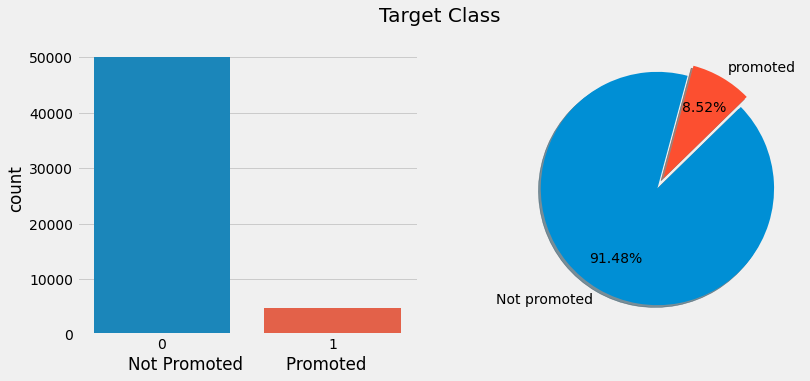

In [8]:
plt.rcParams["figure.figsize"] = (12,5)
plt.style.use("fivethirtyeight")
plt.subplot(1,2,1)
sns.countplot(train["is_promoted"])
plt.xlabel("Not Promoted        Promoted")

plt.subplot(1,2,2)
train["is_promoted"].value_counts().plot(kind="pie",shadow=True,autopct="%0.2f%%",
                                        labels = ["Not promoted", "promoted"],explode=[0,0.1],pctdistance=0.7,startangle=75)
plt.suptitle("Target Class",fontsize=20)
plt.axis("off")
plt.show()

we can easily, see that the Target Class is Highly Imbalanced, and we must balance these classes of Target Class. Most of the Times, when we use Machine Learning Models with Imbalanced Classes, we have very poor Results which are completely biased towards the class having Higher Distribution.

In [9]:
report = sweetviz.compare([train,"train"],[test,"test"],"is_promoted")
report.show_html("Report.html")

:FEATURES DONE:                    |█████████████████████| [100%]   00:04  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:04  -> (00:00 left)


Creating Associations graph... DONE!
Report Report.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


# Descriptive statistics

* Descriptive Statistics is one of the most Important Step to Understand the Data and take out Insights
* First we will the Descriptive Statistics for the Numerical Columns
* for Numerical Columns we check for stats such as Max, Min, Mean, count, standard deviation, 25 percentile, 50 percentile, and 75 percentile.
* Then we will check for the Descriptive Statistics for Categorical Columns
* for Categorical Columns we check for stats such as count, frequency, top, and unique elements.

In [10]:
train.iloc[:,1:].describe().style.background_gradient(cmap="summer")

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [11]:
train.describe(include = "object")

,department,region,education,gender,recruitment_channel
count,54808,54808,52399,54808,54808
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,36669,38496,30446


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [13]:
# interactive stats

@interact
def check(column = list(train.select_dtypes("number").mode())):
    print("Max :", train[column].max())
    print("Min :", train[column].min())
    print("Mean : {:0.2f}".format(train[column].mean()))
    print("Median :", train[column].median())
    print("Std : {:0.2f}".format(train[column].std()))
    

interactive(children=(Dropdown(description='column', options=('employee_id', 'no_of_trainings', 'age', 'previo…

# Treatment of Missing Values

* Treatment of Missing Values is very Important Step in any Machine Learning Model Creation 
* Missing Values can be cause due to varios reasons such as the filling incomplete forms, values not available, etc
* There are so many types of Missing Values such as 
     * Missing values at Random
     * Missing values at not Random
     * Missing Values at Completely Random
* What can we do to Impute or Treat Missing values to make a Good Machine Learning Model
    * We can use Business Logic to Impute the Missing Values
    * We can use Statistical Methods such as Mean, Median, and Mode.
    * We can use ML Techniques to impute the Missing values
    * We can delete the Missing values, when the Missing values percentage is very High.
    
* When to use Mean, and when to use Median?
    * We use Mean, when we do not have Outliers in the dataset for the Numerical Variables.
    * We use Median, when we have outliers in the dataset for the Numerical Variables.
    * We use Mode, When we have Categorical Variables.

In [14]:
total1 = train.isnull().sum()
percent1 = ((train.isnull().sum()/train.shape[0])*100).round(2)

total2 = test.isnull().sum()
percent2 = ((test.isnull().sum()/test.shape[0])*100).round(2)

train_missing_data = pd.concat([total1,total2,percent1,percent2],
                                axis=1, 
                                keys=['Train_Total', 'Train_Percent %','Test_Total', 'Test_Percent %'],
                                sort = True)
train_missing_data.style.bar(color ="gold")

,Train_Total,Train_Percent %,Test_Total,Test_Percent %
KPIs_met >80%,0,0.000000,0.000000,0.000000
age,0,0.000000,0.000000,0.000000
avg_training_score,0,0.000000,0.000000,0.000000
awards_won?,0,0.000000,0.000000,0.000000
department,0,0.000000,0.000000,0.000000
education,2409,1034.000000,4.400000,4.400000
employee_id,0,0.000000,0.000000,0.000000
gender,0,0.000000,0.000000,0.000000
is_promoted,0,nan,0.000000,nan
length_of_service,0,0.000000,0.000000,0.000000


We can see from the above table, that Only two columns have missing values in Train and Test Dataset both. Also, the Percentage of Missing values is around 4 and 7% in education, and previous_year_rating respectively. So, do not have delete any missing values, we can simply impute the values using Mean, Median, and Mode Values. 

Lets check the Data Types of these Columns, so that we can impute the missing values in these columns.

In [15]:
# treatment of missing values
train["education"] = train["education"].fillna(train["education"].mode()[0])
train["previous_year_rating"] = train["previous_year_rating"].fillna(train["previous_year_rating"].mode()[0])
print("Missing values in train :", train.isnull().sum().sum())

Missing values in train : 0


In [16]:
test["education"] = test["education"].fillna(test["education"].mode()[0])
test["previous_year_rating"] = test["previous_year_rating"].fillna(test["previous_year_rating"].mode()[0])
print("Missing Values :", test.isnull().sum().sum())

Missing Values : 0


In [17]:
# check missing values

total1 = train.isnull().sum()
percent1 = ((train.isnull().sum()/train.shape[0])*100).round(2)

total2 = test.isnull().sum()
percent2 = ((test.isnull().sum()/test.shape[0])*100).round(2)

train_missing_data = pd.concat([total1,total2,percent1,percent2],
                                axis=1, 
                                keys=['Train_Total', 'Train_Percent %','Test_Total', 'Test_Percent %'],
                                sort = True)
train_missing_data.style.bar(color ="gold")

,Train_Total,Train_Percent %,Test_Total,Test_Percent %
KPIs_met >80%,0,0.000000,0.000000,0.000000
age,0,0.000000,0.000000,0.000000
avg_training_score,0,0.000000,0.000000,0.000000
awards_won?,0,0.000000,0.000000,0.000000
department,0,0.000000,0.000000,0.000000
education,0,0.000000,0.000000,0.000000
employee_id,0,0.000000,0.000000,0.000000
gender,0,0.000000,0.000000,0.000000
is_promoted,0,nan,0.000000,nan
length_of_service,0,0.000000,0.000000,0.000000


# Outlier Detection

The presence of outliers in a classification or regression dataset can result in a poor fit and lower predictive modeling performance. Instead, automatic outlier detection methods can be used in the modeling pipeline and compared, just like other data preparation transforms that may be applied to the dataset.

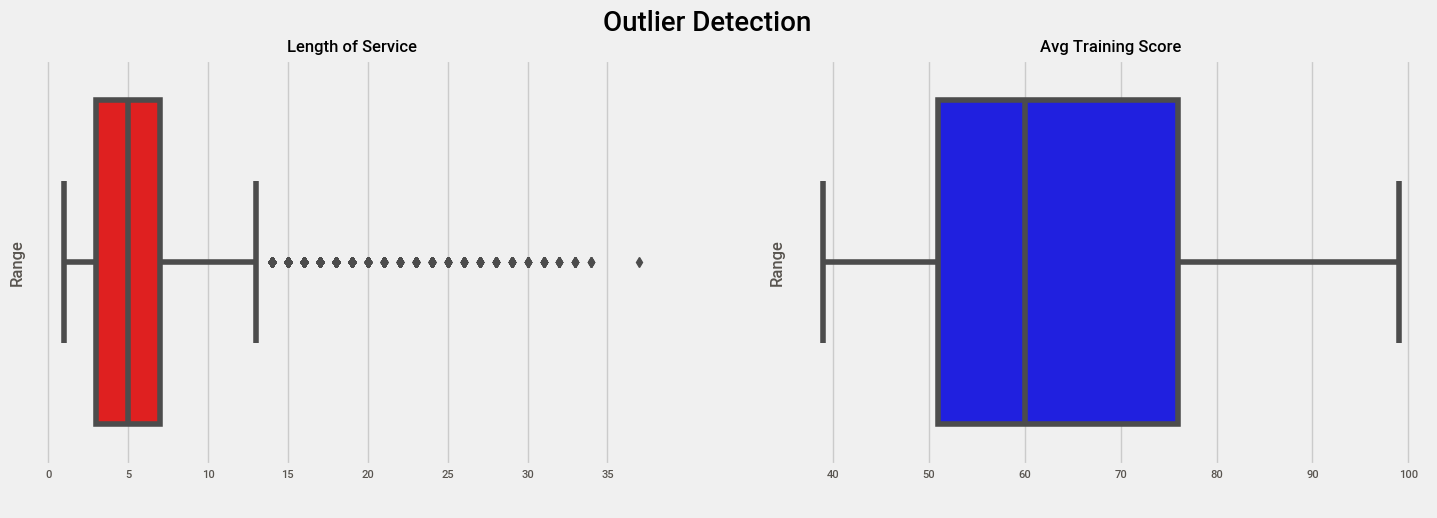

In [18]:

# we wil check on length of service & avg training score
plt.rcParams["figure.figsize"] = (16,5)
plt.style.use("fivethirtyeight")

plt.subplot(1,2,1)
sns.boxplot(train["length_of_service"],color="red")
plt.title("Length of Service",fontsize=12)
plt.ylabel("Range",fontsize=12)
plt.xlabel(" ")

plt.subplot(1,2,2)
sns.boxplot(train["avg_training_score"],color="blue")
plt.title("Avg Training Score",fontsize=12)
plt.suptitle("Outlier Detection",fontsize=20)
plt.ylabel("Range",fontsize=12)
plt.xlabel(" ")
plt.show()

Here, the Box plot, helps us to analyze the middle 50 percentile of the data, and we can clearly check the minimum, maximum, median, and outlier values.

In the Length of service attribute, we can see some points after the Max Value, which can be termed to be as Outliers. We do not need to remove these values, as the values are not very far and Huge.

We, also check the Distribution of these attributes after checking the Box Plot so that we can be more clear about the Values present in these columns.

## Univariate Analysis

Univariate analysis is perhaps the simplest form of statistical analysis. Like other forms of statistics, it can be inferential or descriptive. The key fact is that only one variable is involved. Univariate analysis can yield misleading results in cases in which multivariate analysis is more appropriate.

* This is an Essential step, to understand the variables present in the dataset one by one.
* First, we will check the Univariate Analysis for Numerical Columns to check for Outliers by using Box plots.
* Then, we will use Distribution plots to check the distribution of the Numerical Columns in the Dataset.
* After that we will check the Univariate Analysis for Categorical Columns using Pie charts, and Count plots.
* We Use Pie charts, when we have very few categories in the categorical column, and we use count plots we have more categorises in the dataset.

In [19]:
train.describe(include="number")

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.304481,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.214770,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


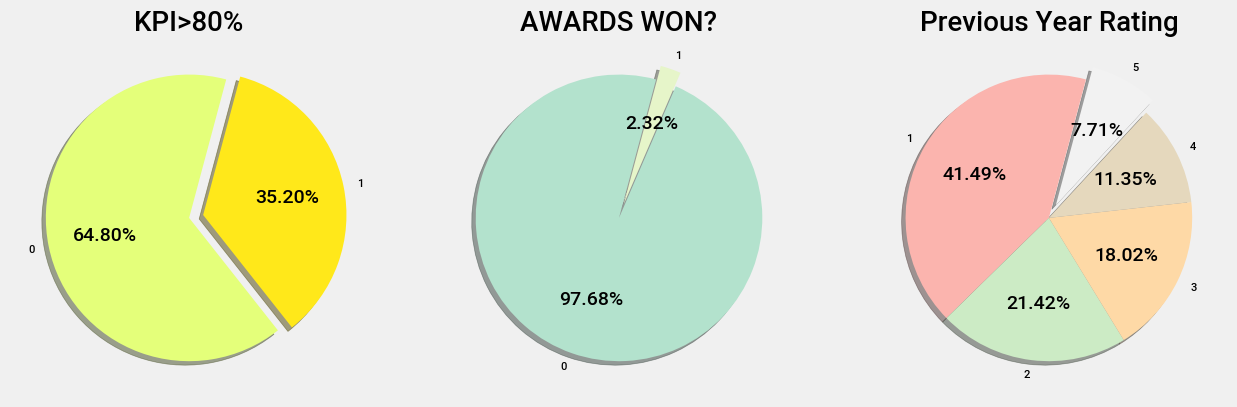

In [20]:
#pie chart for KPI & AWARD & PREVIOUS YEAR RATING
plt.rcParams["figure.figsize"] = (14,5)
plt.style.use("fivethirtyeight")

#  KPI

plt.subplot(1,3,1)
colors = plt.cm.Wistia(np.linspace(0,1,5))
sizes = train["KPIs_met >80%"].value_counts()
labels = ["0","1"]
explode = [0,0.1]
plt.pie(sizes,explode=explode,colors=colors,labels=labels,shadow=True,startangle=75,autopct="%0.2f%%")
plt.title("KPI>80%",fontsize=20)

#  AWARDS
plt.subplot(1,3,2)
colors = plt.cm.Pastel2(np.linspace(0,2,5))
sizes = train["awards_won?"].value_counts()
labels = ["0","1"]
explode = [0,0.1]
plt.title("AWARDS WON?",fontsize=20)
plt.pie(sizes,explode=explode,colors=colors,labels=labels,shadow=True,startangle=75,autopct="%0.2f%%")

# Previous Year Rating
plt.subplot(1,3,3)
colors = plt.cm.Pastel1(np.linspace(0,1,5))
sizes = train["previous_year_rating"].value_counts()
labels = ["1","2","3","4","5"]
explode = [0,0,0,0,.1]
plt.title("Previous Year Rating",fontsize=20)
plt.pie(sizes,explode=explode,colors=colors,labels=labels,shadow=True,startangle=75,autopct="%0.2f%%")

plt.show()

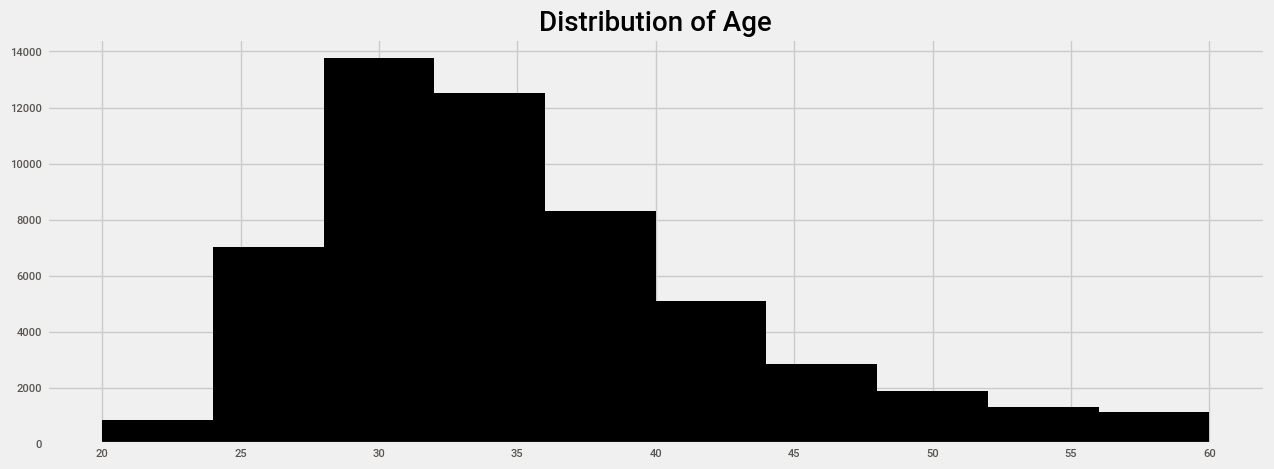

In [21]:
# age distribution
plt.rcParams["figure.figsize"] = (14,5)
plt.style.use("fivethirtyeight")
plt.hist(train["age"], color="black")
plt.title("Distribution of Age",fontsize=20)
plt.show()

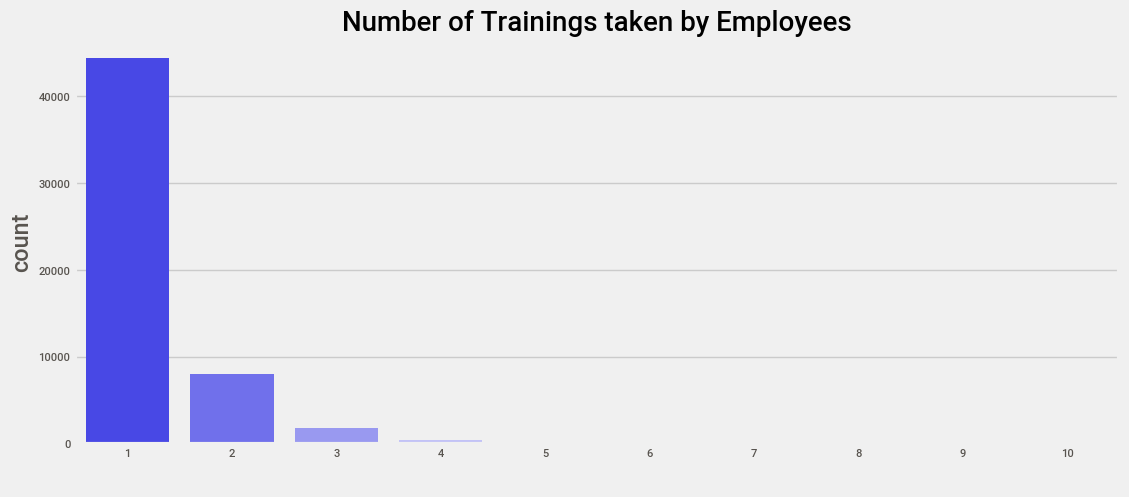

In [22]:
# Number of trainings
plt.rcParams["figure.figsize"] = (12,5)
plt.style.use("fivethirtyeight")
sns.countplot(train["no_of_trainings"],palette = "bwr")
plt.title("Number of Trainings taken by Employees",fontsize=20)
plt.xlabel(" ")
plt.show()

The above Countplot, where are checking the distribution of trainings undertaken by the Employee, It is clearly visible that 80 % of the employees have taken the training only once, and there are negligible no. of employees, who took trainings more than thrice.

In [23]:
train.describe(include = "object")

,department,region,education,gender,recruitment_channel
count,54808,54808,54808,54808,54808
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,39078,38496,30446


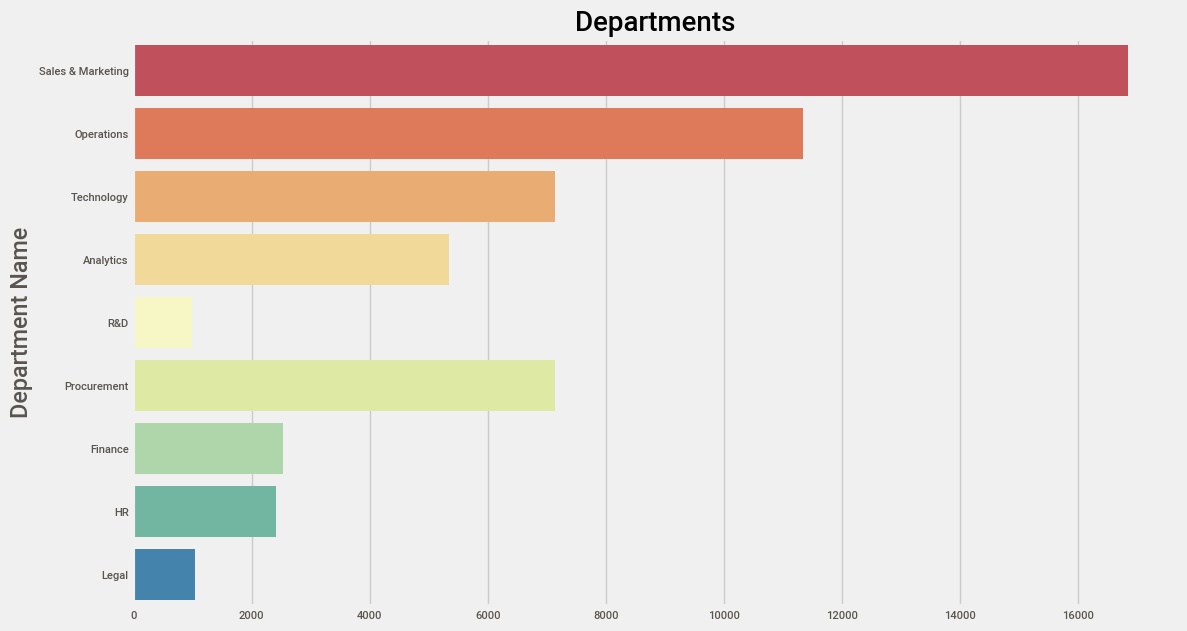

In [24]:
# Department
plt.rcParams["figure.figsize"] = (12,7)
plt.style.use("fivethirtyeight")
sns.countplot(y = train["department"], palette = "Spectral" , orient = "v")
plt.title("Departments",fontsize=20)
plt.xlabel('')
plt.ylabel('Department Name')
plt.show()

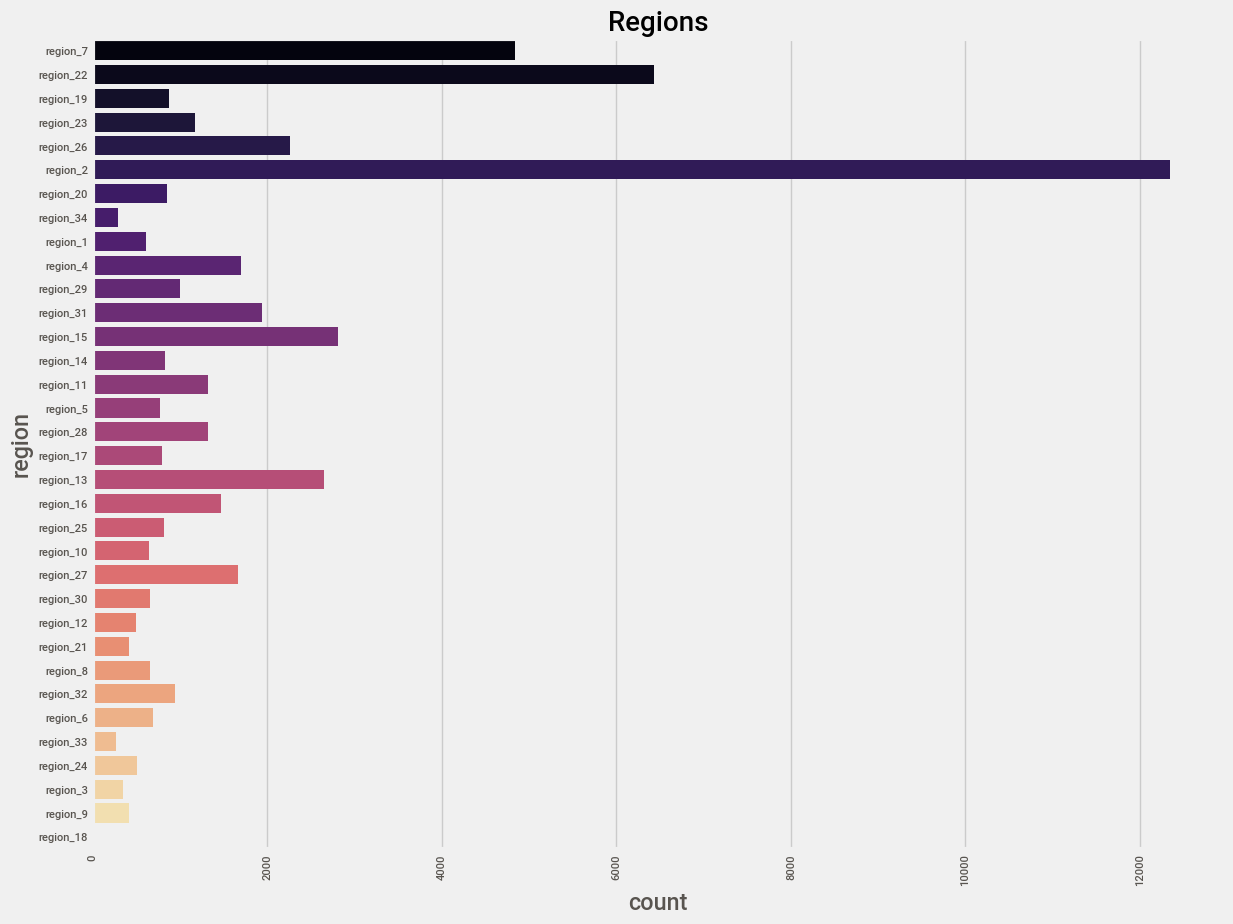

In [25]:
# region 
plt.rcParams["figure.figsize"] = (13,10)
plt.style.use("fivethirtyeight")
sns.countplot(y = train["region"], palette = "magma", orient = "v")
plt.xticks(rotation=90)
plt.title("Regions",fontsize=20)
plt.show()

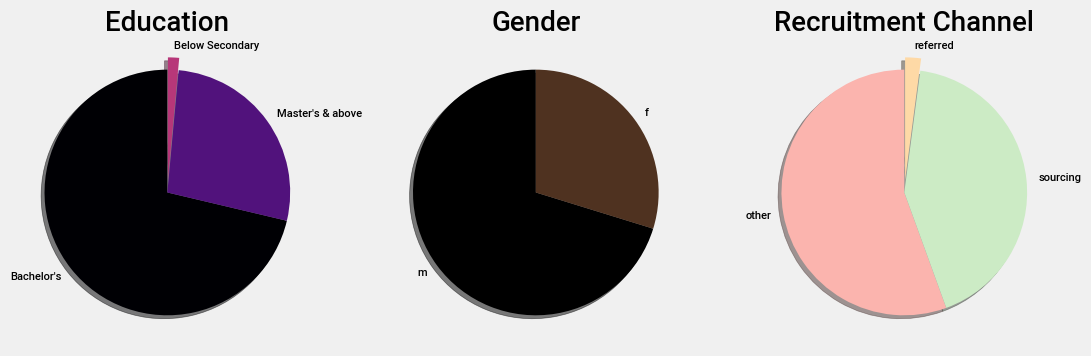

In [26]:
# lets plot pie chart for the columns where we have very few categories

plt.rcParams['figure.figsize'] = (12,7)

# plotting a pie chart to represent share of Previous year Rating of the Employees
plt.subplot(1, 3, 1)
labels = train['education'].value_counts().index
sizes = train['education'].value_counts()
colors = plt.cm.magma(np.linspace(0, 1, 5))
explode = [0, 0, 0.1]

plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Education', fontsize = 20)

# plotting a pie chart to represent share of Previous year Rating of the Employees
plt.subplot(1, 3, 2)
labels = train['gender'].value_counts().index
sizes = train['gender'].value_counts()
colors = plt.cm.copper(np.linspace(0, 1, 5))
explode = [0, 0]

plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Gender', fontsize = 20)

# plotting a pie chart to represent share of Previous year Rating of the Employees
plt.subplot(1, 3, 3)
labels = train['recruitment_channel'].value_counts().index
sizes = train['recruitment_channel'].value_counts()
colors = plt.cm.Pastel1(np.linspace(0, 1, 5))
explode = [0,0,0.1]

plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Recruitment Channel', fontsize = 20)

plt.show()

From, the above pie charts displayed for representing Education, Gender, and Recruitment Channel.

lets infer the Main Highlights
Very Few employees are actually working only after their Secondary Education, 
Obviously Females are again in Minority as compared to their Male Counterparts.
and the Recruitment Channel, says that the Referred Employees are very less, i.e., most of the employees are recruited either by sourcing, or some other recruitment agencies, sources etc.

In [27]:
plt.rcParams["figure.figsize"] = (12,6) 

@interact_manual
def check(column = list(train.select_dtypes("object").columns),
         palette = ["prism","Pastel1","Reds","Blues","cividis","viridis"]):
    sns.countplot(train[column],palette = palette)


interactive(children=(Dropdown(description='column', options=('department', 'region', 'education', 'gender', '…

# Bivariate Analysis


Bivariate analysis is one of the simplest forms of quantitative analysis. It involves the analysis of two variables, for the purpose of determining the empirical relationship between them. Bivariate analysis can be helpful in testing simple hypotheses of association.

* Types of Bivariate Analysis
    * Categorical vs Categorical 
    * Categorical vs Numerical
    * Numerical vs Numerical
    
* First, we will perform Categorical vs Categorical Analysis using Stacked and Grouped Bar Charts with the help of crosstab function.
* Second, we will perform Categorical vs Numerical Analysis using Bar Charts, Box plots, Strip plots, Swarm plots, Boxen plots, Violin Plots, etc
* Atlast, we will perform Numerical vs Numerical Analysis using Scatter plots.

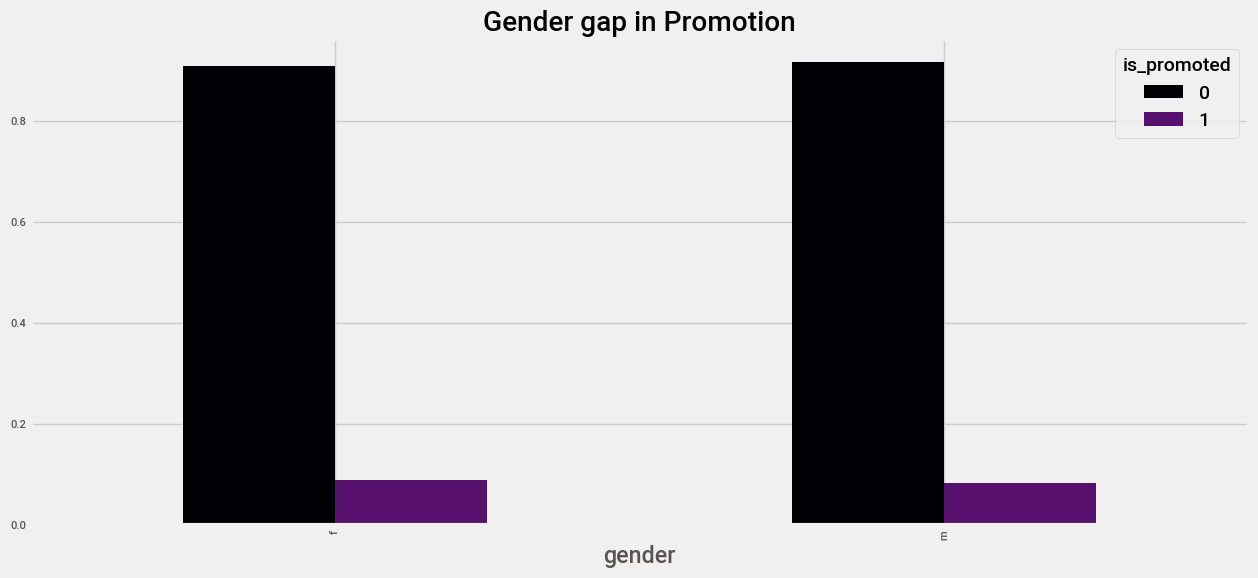

In [28]:
# Lets compare the Gender Gap in the promotion

import warnings
warnings.filterwarnings('ignore')

plt.rcParams["figure.figsize"] = (14,6)
plt.style.use("fivethirtyeight")
colors = plt.cm.inferno(np.linspace(0,1,5))
x = pd.crosstab(train["gender"],train["is_promoted"])
x.div(x.sum(1).astype(float),axis=0).plot(kind="bar", stacked = False, color = colors)
plt.title("Gender gap in Promotion")
plt.show()

As we have already seen that the Females are in Minority, but when it comes to Promotion, they are competing with their Men Counterparts neck-to-neck. That's a great Inference.

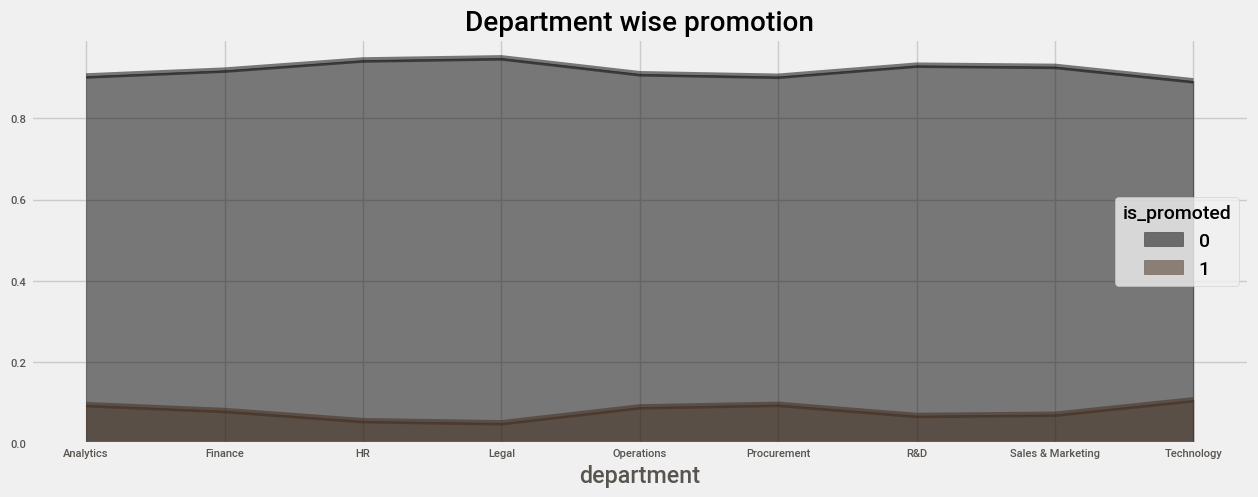

In [29]:
# lets compare the effect of different Departments and Promotion
plt.rcParams["figure.figsize"] = (14,5)
plt.style.use("fivethirtyeight")
colors = plt.cm.copper(np.linspace(0,1,6))
x = pd.crosstab(train["department"],train["is_promoted"])
x.div(x.sum(1).astype(float),axis = 0).plot(kind = "area", stacked=False , color = colors)
plt.title("Department wise promotion")
plt.show()

From, the above chart we can see that almost all the Departments have a very similar effect on Promotion. So, we can consider that all the Departments have a similar effect on the promotion. Also, this column comes out to be lesser important in making a Machine Learning Model, as it does not contribute at all when it comes to Predicting whether the Employee should get Promotion.

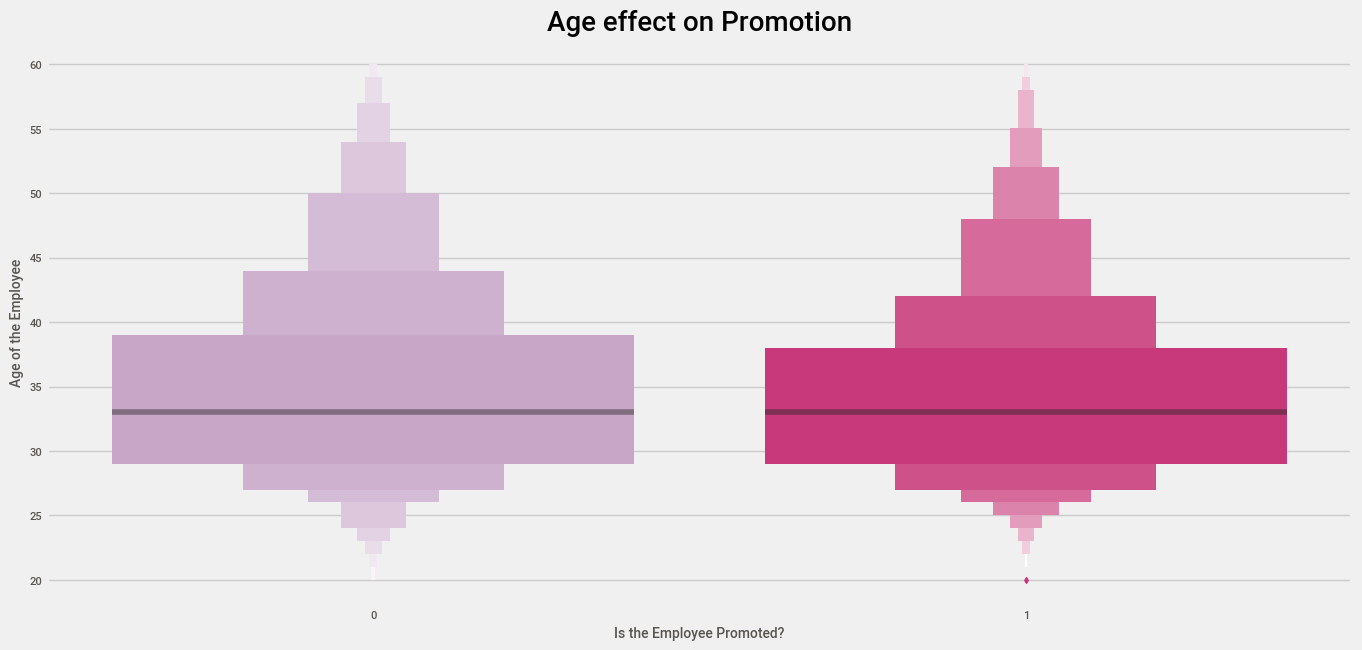

In [30]:
# lets compare the effect of Age and Promotion
plt.rcParams["figure.figsize"] = (15,7)
plt.style.use("fivethirtyeight")
sns.boxenplot(train["is_promoted"],train["age"], palette = "PuRd")
plt.title("Age effect on Promotion",fontsize=20)
plt.xlabel('Is the Employee Promoted?', fontsize = 10)
plt.ylabel('Age of the Employee', fontsize = 10)
plt.show()

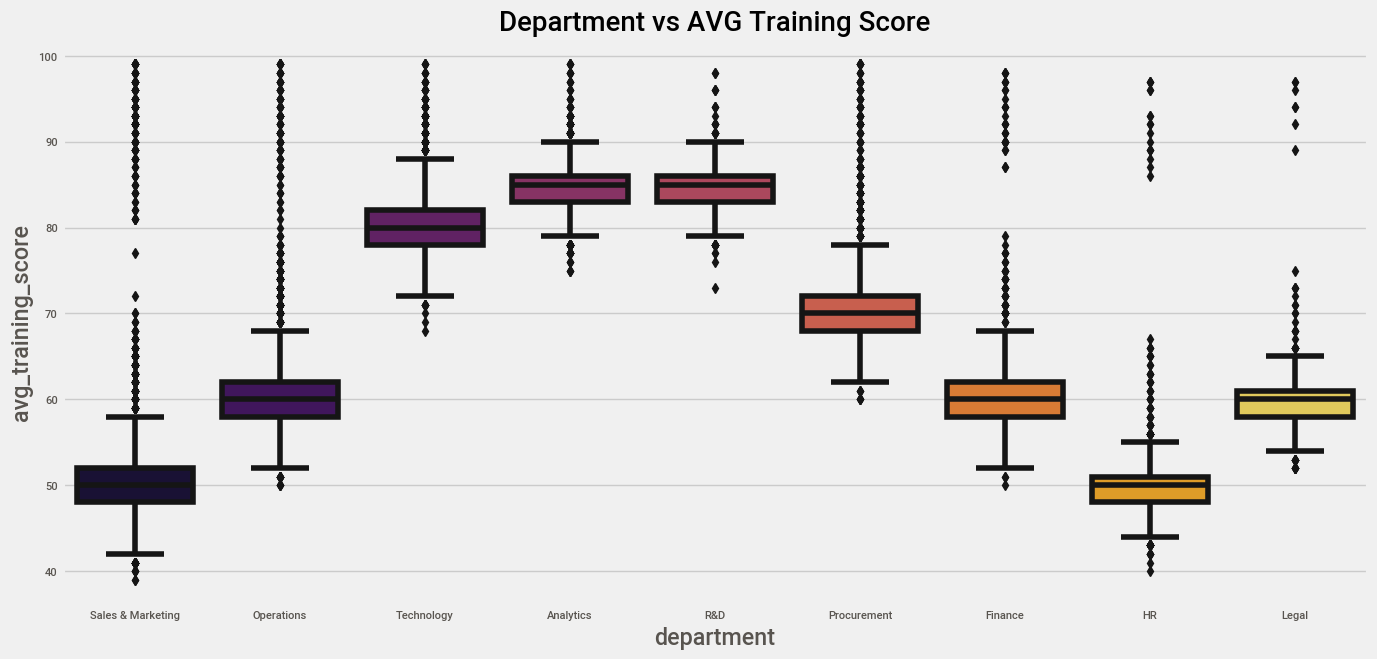

In [31]:
# Department Vs Average Training Score
plt.rcParams["figure.figsize"] = (15,7)
plt.style.use("fivethirtyeight")
sns.boxplot(train["department"],train["avg_training_score"], palette = "inferno")
plt.title("Department vs AVG Training Score",fontsize=20)
plt.show()

In [32]:
# lets make an Interactive Function for Bivariate Analysis
plt.rcParams["figure.figsize"] = (15,5)

@interact_manual

def bivariate_plot(column1 = list(train.select_dtypes("object").columns),
                  column2 = list(train.select_dtypes("number").columns[1:])):
    sns.boxenplot(train[column1],train[column2])

interactive(children=(Dropdown(description='column1', options=('department', 'region', 'education', 'gender', …

In [33]:
plt.rcParams["figure.figsize"] = (14,5)

@interact_manual

def bivariate_plot(column1 = list(train.select_dtypes("object").columns),
                  column2 = list(train.select_dtypes("number").columns[1:])):
    sns.boxplot(train[column1],train[column2])

interactive(children=(Dropdown(description='column1', options=('department', 'region', 'education', 'gender', …

## Multivariate Analysis

Multivariate analysis is based on the principles of multivariate statistics, which involves observation and analysis of more than one statistical outcome variable at a time.

* First, we will use the Correlation Heatmap to check the correlation between the Numerical Columns
* Then we will check the ppscore or the Predictive Score to check the correlation between all the columns present in the data.
* Then, we will use Bubble Charts, split Violin plots, Hue with Bivariate Plots.

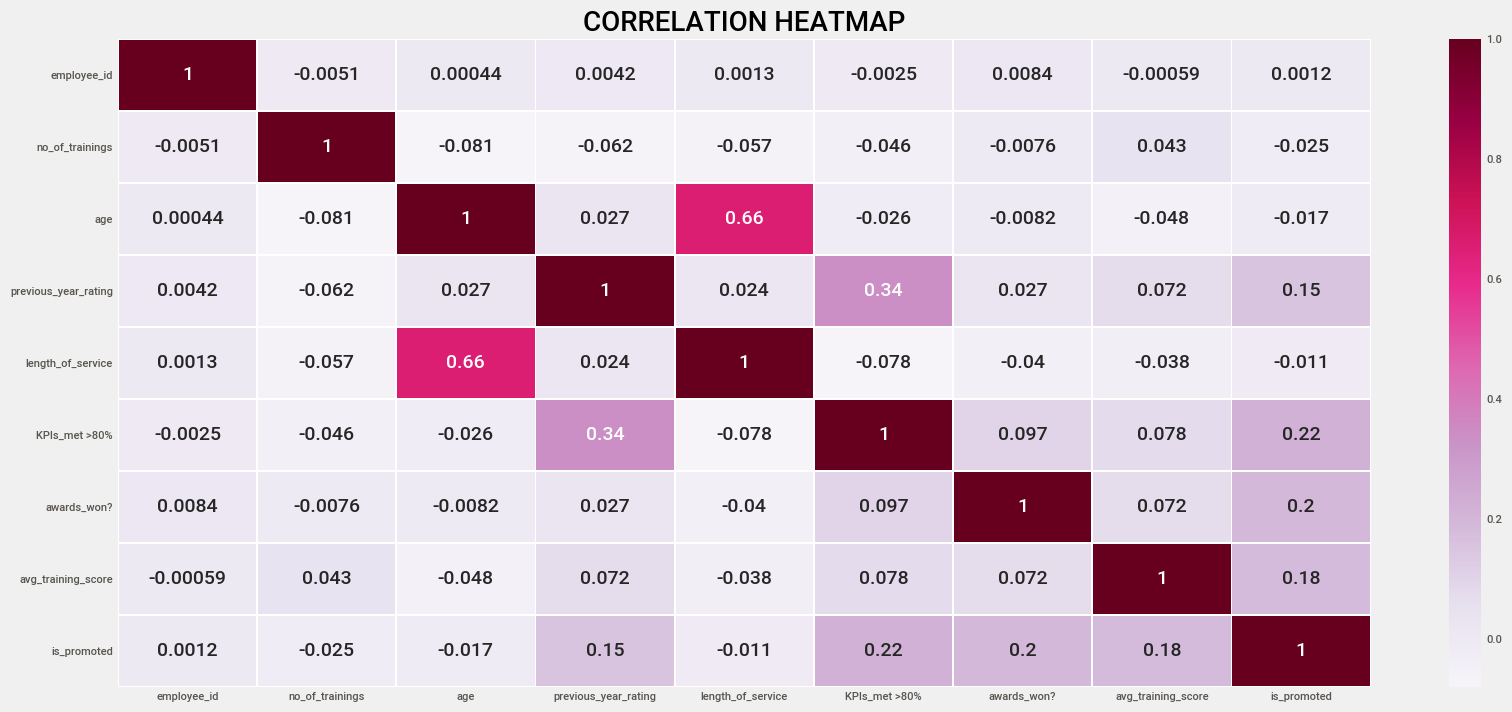

In [34]:
# lets check the Heat Map for the Data with respect to correlation.
plt.rcParams["figure.figsize"] = (18,8)
plt.style.use("fivethirtyeight")
sns.heatmap(train.corr(), annot=True,linewidth =  0.5,cmap = "PuRd")
plt.title("CORRELATION HEATMAP",fontsize=20)
plt.show()

Here, we can see some obvious results, that is Length of Service, and Age are Highly Correlated,
Also, KPIs, and Previous year rating are correlated to some extent, hinting that there is some relation.

After checking the Predictive Power score, we can see that there is one more pattern, that is the Department and Average Training Score is very Highly Correlated, lets check that out in a separte chart.

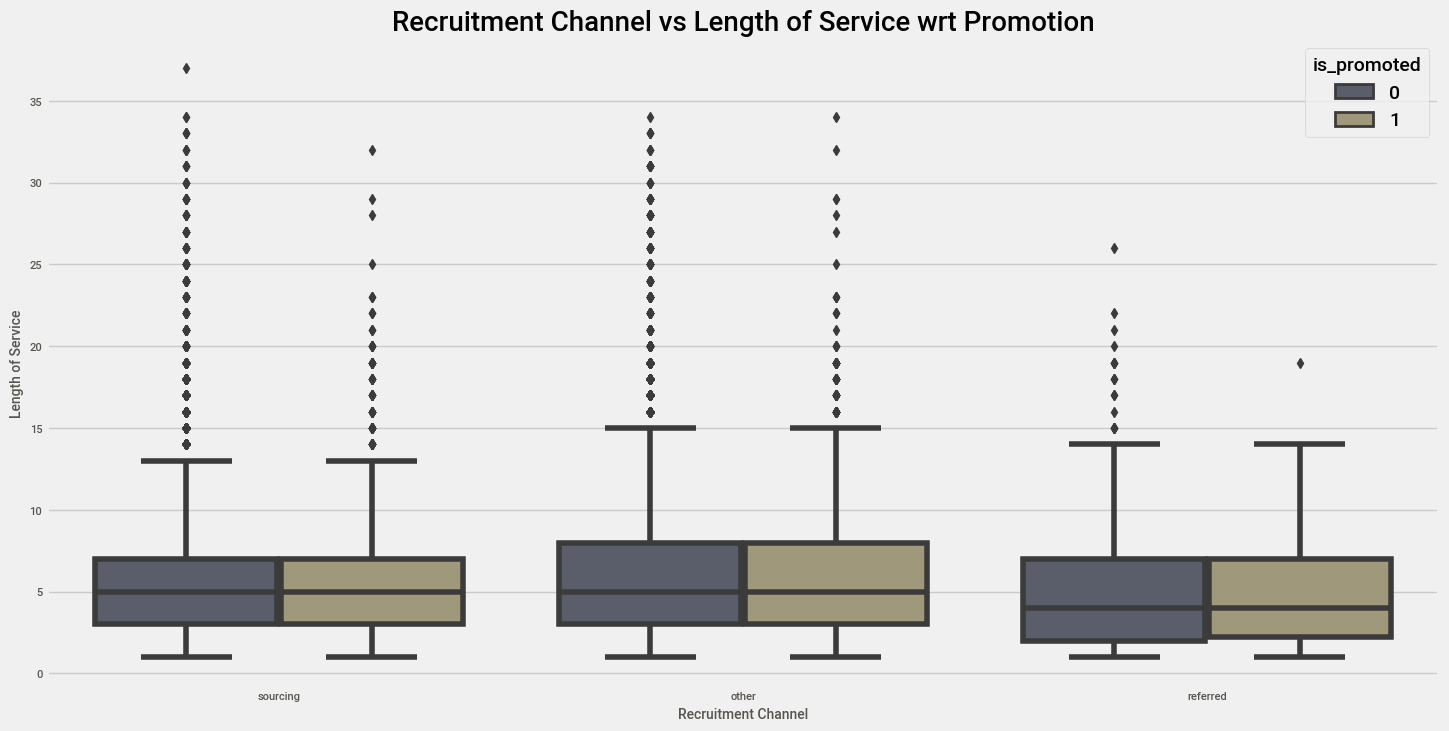

In [35]:
# lets check the relation of Recruitment Channel, length of service and Promotions when they won awards ?
plt.rcParams["figure.figsize"] = (16,8)
plt.style.use("fivethirtyeight")
sns.boxplot(train["recruitment_channel"],
           train["length_of_service"],
           hue = train["is_promoted"],
           palette = "cividis")
plt.title("Recruitment Channel vs Length of Service wrt Promotion", fontsize = 20)
plt.ylabel('Length of Service', fontsize = 10)
plt.xlabel('Recruitment Channel', fontsize = 10)
plt.show()

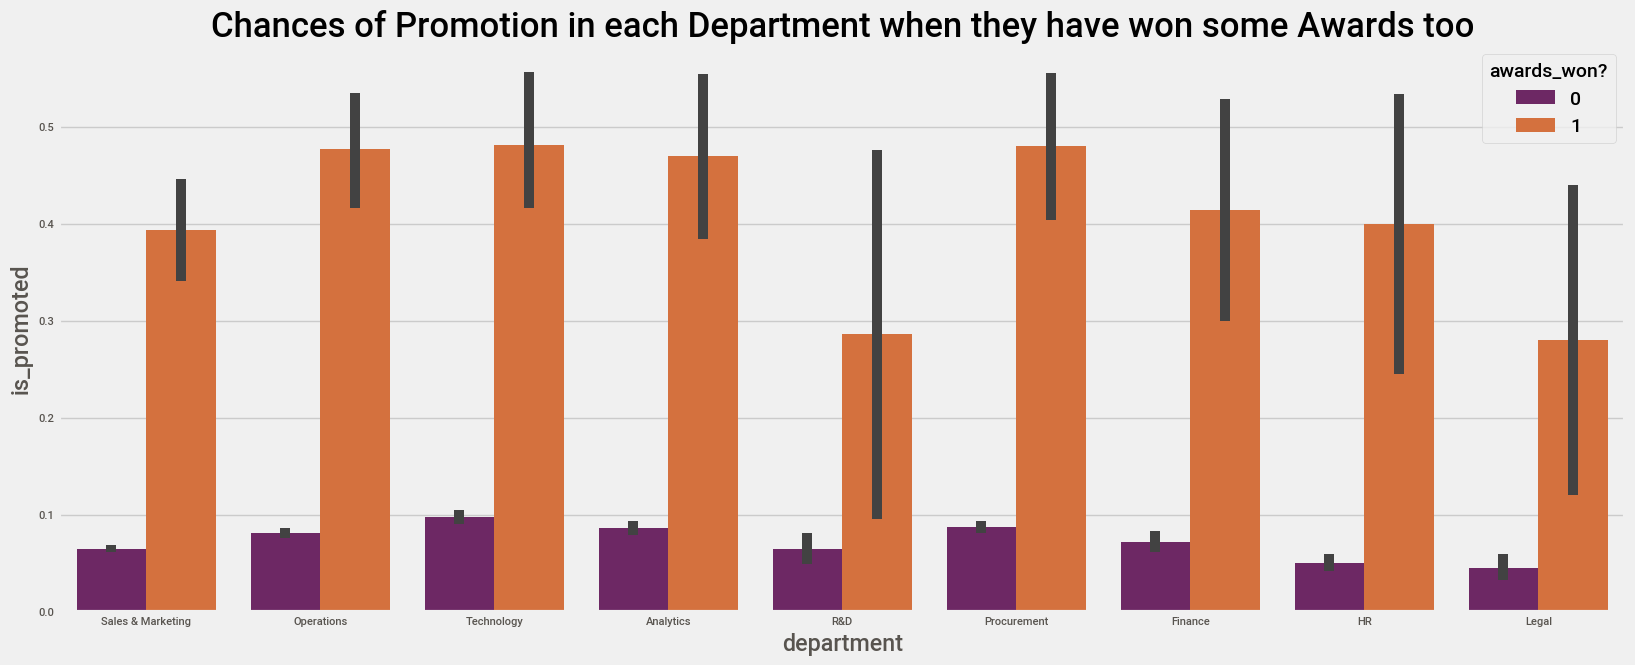

In [36]:
# lets check the relation of Departments and Promotions when they won awards ?
plt.rcParams["figure.figsize"] = (18,7)
plt.style.use("fivethirtyeight")
sns.barplot(train["department"],train["is_promoted"], hue = train['awards_won?'], palette = "inferno")
plt.title('Chances of Promotion in each Department when they have won some Awards too', fontsize = 25)
plt.show()

## Feature Engineering

Feature engineering is the process of using domain knowledge to extract features from raw data via data mining techniques. These features can be used to improve the performance of machine learning algorithms. Feature engineering can be considered as applied machine learning itself.

* There are mutliple ways of performing feature engineering.
* So many people in the Industry consider it the most important step to improve the Model Performance.
* We should always understand the columns well to make some new features using the old existing features.
* Let's discuss the ways how we can perform feature engineering
    * We can perform Feature Engineering by Removing Unnecassary Columns
    * We can do it by Extracting Features from the Date and Time Features.
    * We can do it by Extracting Features from the Categorcial Features.
    * We can do it by Binnning the Numerical and Categorical Features.
    * We can do it by Aggregating Multiple Features together by using simple Arithmetic operations
    
* Here, we are only going to perform Feature Engineering by Aggregating some features together.# Feature Engineering

In [37]:
train.select_dtypes(include = "object").head()

,department,region,education,gender,recruitment_channel
0,Sales & Marketing,region_7,Master's & above,f,sourcing
1,Operations,region_22,Bachelor's,m,other
2,Sales & Marketing,region_19,Bachelor's,m,sourcing
3,Sales & Marketing,region_23,Bachelor's,m,other
4,Technology,region_26,Bachelor's,m,other


In [38]:
# lets create some extra features from existing features to improve our Model
train['sum_metric'] = train["KPIs_met >80%"] + train["awards_won?"] + train["previous_year_rating"]
test['sum_metric'] = test["KPIs_met >80%"] + test["awards_won?"] + test["previous_year_rating"]

# more interesting
train["total_score"] = train["avg_training_score"] * train["no_of_trainings"]
test["total_score"] = test["avg_training_score"] * train["no_of_trainings"]

In [39]:
# remove useless columns

train = train.drop(['recruitment_channel', 'region', 'employee_id'], axis = 1)
test = test.drop(['recruitment_channel', 'region', 'employee_id'], axis = 1)

train.columns

Index(['department', 'education', 'gender', 'no_of_trainings', 'age',
       'previous_year_rating', 'length_of_service', 'KPIs_met >80%',
       'awards_won?', 'avg_training_score', 'is_promoted', 'sum_metric',
       'total_score'],
      dtype='object')

## Grouping and Filtering Operations

The grouping operations are the fundamental components of the entity clustering technique. They define what collections of entities and relationships comprise higher-level objects, the entity clusters. 

* In the world of Data Science and Analytics, people consider Grouping and Filtering Operations as one of the most important steps to investigate the data.
* It helps us to make some very important Decisions using filters, and the groupby Function.# Groupby & Filtering

In [40]:
## lets check the relation between KPIs Met and Promotion
x = pd.crosstab(train["KPIs_met >80%"],train["is_promoted"])
x.style.background_gradient(cmap="Pastel1")

is_promoted,0,1
KPIs_met >80%,,
0,34111,1406
1,16029,3262


In [41]:
## lets check the relation between no of training and Promotion
x = pd.crosstab(train["no_of_trainings"],train["is_promoted"])
x.style.background_gradient(cmap="Pastel1")

is_promoted,0,1
no_of_trainings,,
1,40468,3910
2,7382,605
3,1654,122
4,442,26
5,125,3
6,42,2
7,12,0
8,5,0
9,5,0


In [42]:
## lets check the relation between award won and Promotion
x = pd.crosstab(train["awards_won?"],train["is_promoted"])
x.style.background_gradient(cmap="Pastel1")

is_promoted,0,1
awards_won?,,
0,49429,4109
1,711,559


In [43]:
# lets check the no. eployees who won awards from each Department
train[["department", "awards_won?"]].groupby(["department"]).agg('sum').sort_values(by = "awards_won?",
                                                                    ascending=False).style.background_gradient('magma')

,awards_won?
department,
Sales & Marketing,361
Operations,262
Technology,185
Procurement,171
Analytics,130
Finance,70
HR,45
Legal,25
R&D,21


In [44]:
# lets group the employees based on their Education

@interact
def group(column = list(train.select_dtypes('object').columns)):
    return train[[column, 'is_promoted']].groupby([column]).agg(['count',
                                                'sum', 'mean','min','max']).style.background_gradient(cmap = 'viridis')

interactive(children=(Dropdown(description='column', options=('department', 'education', 'gender'), value='dep…

In [45]:
## lets use the interactive function to make it more reusable

@interact
def group_operations(column = list(train.select_dtypes('object').columns),
                     column2 = list(train.select_dtypes('number').columns)[1:]):
    return train[[column, column2]].groupby([column]).agg('count').style.background_gradient(cmap = 'PuRd')

interactive(children=(Dropdown(description='column', options=('department', 'education', 'gender'), value='dep…

In [46]:
# lets get the names of all the employees who have taken trainings more than 7 Times

@interact
def check(column = 'no_of_trainings', x = 5):
    y = train[train['no_of_trainings'] > x]
    return y['is_promoted'].value_counts()

interactive(children=(Text(value='no_of_trainings', description='column'), IntSlider(value=5, description='x',…

In [47]:
# lets also check the value counts of the number of trainings employee took.
train['no_of_trainings'].value_counts()

1     44378
2      7987
3      1776
4       468
5       128
6        44
7        12
10        5
9         5
8         5
Name: no_of_trainings, dtype: int64

In [48]:
# lets cap the values of number of trainings after 5, as the chances of promotion is negligible after 5th training 

train['no_of_trainings'] = train['no_of_trainings'].replace((6, 7, 8, 9, 10),(5, 5, 5, 5, 5))

# lets check the values of no. of trainings after capping the values
train['no_of_trainings'].value_counts()

1    44378
2     7987
3     1776
4      468
5      199
Name: no_of_trainings, dtype: int64

In [49]:
'''
lets check the no. of employee who did not get an award, did not acheive 80+ KPI, previous_year_rating as 1
and avg_training score is less than 40
but, still got promotion.
''' 

train[(train['KPIs_met >80%'] == 0) & (train['previous_year_rating'] == 1.0) & 
      (train['awards_won?'] == 0) & (train['avg_training_score'] < 60) & (train['is_promoted'] == 1)]

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,sum_metric,total_score
31860,Sales & Marketing,Bachelor's,m,1,27,1.0,2,0,0,58,1,1.0,58
51374,Sales & Marketing,Bachelor's,m,1,31,1.0,5,0,0,58,1,1.0,58


In [50]:
# lets remove the above two columns as they have a huge negative effect on our training data

# lets check shape of the train data before deleting two rows
print("Before Deleting the above two rows :", train.shape)

train = train.drop(train[(train['KPIs_met >80%'] == 0) & (train['previous_year_rating'] == 1.0) & 
      (train['awards_won?'] == 0) & (train['avg_training_score'] < 60) & (train['is_promoted'] == 1)].index)

# lets check the shape of the train data after deleting the two rows
print("After Deletion of the above two rows :", train.shape)

Before Deleting the above two rows : (54808, 13)
After Deletion of the above two rows : (54806, 13)


In [51]:
# lets check how many of the employees have greater than 30 years of service and still do not get promotion

@interact
def check_promotion(x = 20):
    x = train[(train['length_of_service'] > x)]
    return x['is_promoted'].value_counts()
   

interactive(children=(IntSlider(value=20, description='x', max=60, min=-20), Output()), _dom_classes=('widget-…

## Dealing with Categorical Columns

Categorical variables are known to hide and mask lots of interesting information in a data set. It’s crucial to learn the methods of dealing with such variables. If you won’t, many a times, you’d miss out on finding the most important variables in a model. It has happened with me. Initially, I used to focus more on numerical variables. Hence, never actually got an accurate model. But, later I discovered my flaws and learnt the art of dealing with such variables.

* There are various ways to encode categorical columns into Numerical columns
* This is an Essential Step, as we Machine Learning Models only works with Numerical Values.
* Here, we are going to use Business Logic to encode the education column
* Then we will use the Label Encoder, to Department and Gender Columns

In [52]:
## Lets check the categorical columns present in the data
train.select_dtypes("object").head()

,department,education,gender
0,Sales & Marketing,Master's & above,f
1,Operations,Bachelor's,m
2,Sales & Marketing,Bachelor's,m
3,Sales & Marketing,Bachelor's,m
4,Technology,Bachelor's,m


In [53]:
# lets check the value counts for the education column
train["education"].value_counts()

Bachelor's          39076
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [54]:
# lets start encoding these categorical columns to convert them into numerical columns
from sklearn.preprocessing import LabelEncoder

# lets encode the education in their degree of importance 
train['education'] = train['education'].replace(("Master's & above", "Bachelor's", "Below Secondary"),
                                                (3, 2, 1))
test['education'] = test['education'].replace(("Master's & above", "Bachelor's", "Below Secondary"),
                                                (3, 2, 1))


# lets use Label Encoding for Gender and Department to convert them into Numerical
le =LabelEncoder()
train['department'] = le.fit_transform(train['department'])
test['department'] = le.fit_transform(test['department'])
train['gender'] = le.fit_transform(train['gender'])
test['gender'] = le.fit_transform(test['gender'])


In [55]:
# Optional Encoding Way

categorical_col = train.select_dtypes(include=['object']).columns

# Initializing lable encoder
le = LabelEncoder()

# Initializing Label Encoder
le = LabelEncoder()

# Iterating through each of the categorical columns and label encoding them
for feature in categorical_col:
    try:
        train[feature] = le.fit_transform(train[feature])
        test[feature] = le.fit_transform(test[feature])

    except:
        print('Error encoding '+feature)

In [56]:
train.head(10)

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,sum_metric,total_score
0,7,3,0,1,35,5.0,8,1,0,49,0,6.0,49
1,4,2,1,1,30,5.0,4,0,0,60,0,5.0,60
2,7,2,1,1,34,3.0,7,0,0,50,0,3.0,50
3,7,2,1,2,39,1.0,10,0,0,50,0,1.0,100
4,8,2,1,1,45,3.0,2,0,0,73,0,3.0,73
5,0,2,1,2,31,3.0,7,0,0,85,0,3.0,170
6,4,2,0,1,31,3.0,5,0,0,59,0,3.0,59
7,4,3,1,1,33,3.0,6,0,0,63,0,3.0,63
8,0,2,1,1,28,4.0,5,0,0,83,0,4.0,83
9,7,3,1,1,32,5.0,5,1,0,54,0,6.0,54


In [57]:
#test.to_csv('test.csv',index=False)

In [58]:
test.head()

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,sum_metric,total_score
0,8,2,1,1,24,3.0,1,1,0,77,4.0,77.0
1,2,2,0,1,31,3.0,5,0,0,51,3.0,51.0
2,7,2,1,1,31,1.0,4,0,0,47,1.0,47.0
3,5,2,0,3,31,2.0,9,0,0,65,2.0,130.0
4,1,2,1,1,30,4.0,7,0,0,61,4.0,61.0


# Splitting the Data

This is one of the most Important step to perform Machine Learning Prediction on a Dataset,
We have to separate the Target and Independent Columns.
* We store the Target Variable in y, and then we store the rest of the columns in x, by deleting the target column from the data
* Also, we are changing the name of test dataset to x_test for ease of understanding.

In [59]:
y = train["is_promoted"]
x = train.drop(["is_promoted"],axis = 1)
x_test = x

In [60]:
# lets print the shapes of these newly formed data sets
print("Shape of the x :", x.shape)
print("Shape of the y :", y.shape)
print("Shape of the x Test :", x_test.shape)

Shape of the x : (54806, 12)
Shape of the y : (54806,)
Shape of the x Test : (54806, 12)


# Resampling

Resampling is the method that consists of drawing repeated samples from the original data samples. The method of Resampling is a nonparametric method of statistical inference.

* Earlier, in this Problem we noticed that the Target column is Highly Imbalanced, we need to balance the data by using some Statistical Methods.
* There are many Statistical Methods we can use for Resampling the Data such as:
    * Over Samping
    * Cluster based Sampling
    * Under Sampling.
    
Oversampling and undersampling in data analysis are techniques used to adjust the class distribution of a data set. These terms are used both in statistical sampling, survey design methodology and in machine learning. Oversampling and undersampling are opposite and roughly equivalent techniques
    
* We are going to use Over Sampling. 
* We will not use Under Sampling to avoid data loss.

In [61]:
# It is very important to resample the data, as the Target class is Highly imbalanced.
# Here We are going to use Over Sampling Technique to resample the data.
# lets import the SMOTE algorithm to do the same.

from imblearn.over_sampling import SMOTE

x_resample, y_resample  = SMOTE().fit_sample(x, y.values.ravel())

# lets print the shape of x and y after resampling it
print(x_resample.shape)
print(y_resample.shape)

(100280, 12)
(100280,)


In [62]:
# lets also check the value counts of our target variable

print("Before Resampling :")
print(y.value_counts())

print("After Resampling :")
y_resample = pd.DataFrame(y_resample)
print(y_resample[0].value_counts())

Before Resampling :
0    50140
1     4666
Name: is_promoted, dtype: int64
After Resampling :
1    50140
0    50140
Name: 0, dtype: int64


In [63]:
# lets create a validation set from the training data so that we can check whether the model that we have created is good enough
# lets import the train_test_split library from sklearn to do that

from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x_resample, y_resample, test_size = 0.2, random_state = 42)

# lets print the shapes again 
print("Shape of the x Train :", x_train.shape)
print("Shape of the y Train :", y_train.shape)
print("Shape of the x Valid :", x_valid.shape)
print("Shape of the y Valid :", y_valid.shape)
print("Shape of the x Test :", x_test.shape)

Shape of the x Train : (80224, 12)
Shape of the y Train : (80224, 1)
Shape of the x Valid : (20056, 12)
Shape of the y Valid : (20056, 1)
Shape of the x Test : (54806, 12)


# Feature Scaling

Feature scaling is a method used to normalize the range of independent variables or features of data. In data processing, it is also known as data normalization and is generally performed during the data preprocessing step

In [64]:
# It is very import to scale all the features of the dataset into the same scale
# Here, we are going to use the standardization method, which is very commonly used.

# lets import the standard scaler library from sklearn to do that
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_valid = sc.transform(x_valid)
x_test = sc.transform(x_test)

#  Machine Learning Predictive Modelling

Predictive modeling is a process that uses data and statistics to predict outcomes with data models. These models can be used to predict anything from sports outcomes and TV ratings to technological advances and corporate earnings. Predictive modeling is also often referred to as: Predictive analytics.

# Decision Tree Classifier

A decision tree is a decision support tool that uses a tree-like model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. It is one way to display an algorithm that only contains conditional control statements.

In [65]:
train.head()

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,sum_metric,total_score
0,7,3,0,1,35,5.0,8,1,0,49,0,6.0,49
1,4,2,1,1,30,5.0,4,0,0,60,0,5.0,60
2,7,2,1,1,34,3.0,7,0,0,50,0,3.0,50
3,7,2,1,2,39,1.0,10,0,0,50,0,1.0,100
4,8,2,1,1,45,3.0,2,0,0,73,0,3.0,73


Training Accuracy : 0.9908755484642999
Testing Accuracy : 0.9337355404866374


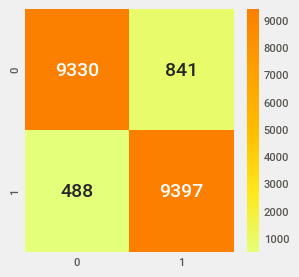

In [66]:
# Lets use Decision Trees to classify the data
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_valid, y_valid))

cm = confusion_matrix(y_valid, y_pred)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'Wistia', fmt = '.8g')
plt.show()

# Feature Selection for Decision Tree Model

In [67]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.feature_selection import RFECV

# The "accuracy" scoring is proportional to the number of correct classifications
model = DecisionTreeClassifier() 
rfecv = RFECV(estimator = model, step = 1, cv = 5, scoring = 'accuracy')
rfecv = rfecv.fit(x_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
x_train = pd.DataFrame(x_train)
print('Best features :', x_train.columns[rfecv.support_])

Optimal number of features : 9
Best features : Int64Index([0, 2, 4, 5, 6, 7, 9, 10, 11], dtype='int64')


As, we can clearly see that Decision Tree Classifier works much better as there are so many attributes which are are equally contributing to the cause, and generally linear Models such as Logistic Regression, wont perform very good, also there is a clear result using RFECV for feature selection, we can see that all the features are Important for Building the Model.

So, we go with the Decision Trees, but a Decision Tree has so many Parameters, lets check whether we can improve our Decision Tree Classifier Model, by changing some of the Default Parameters.

In [68]:
# lets take a look at the Classification Report

cr = classification_report(y_valid, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.95      0.92      0.93     10171
           1       0.92      0.95      0.93      9885

    accuracy                           0.93     20056
   macro avg       0.93      0.93      0.93     20056
weighted avg       0.93      0.93      0.93     20056



Now First, we we will check the descriptive summary of the data again, so that we can analyze the columns and values which we can provide to the Model as Input and expect the Model to return Output whether the Employee should get a promotion or not.

Then we will define the value for which we want the predction, and then finally we will predict the values.

# Real Time Prediction

In [69]:
train.describe()

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,sum_metric,total_score
count,54806.000000,54806.000000,54806.000000,54806.000000,54806.000000,54806.000000,54806.000000,54806.000000,54806.000000,54806.000000,54806.000000,54806.000000,54806.000000
mean,4.972722,2.257636,0.702368,1.250684,34.804127,3.304565,5.865599,0.351987,0.023173,63.386947,0.085137,3.679725,79.771430
std,2.506061,0.469723,0.457221,0.589462,7.660219,1.214712,4.265138,0.477594,0.150453,13.371764,0.279088,1.463326,43.879739
min,0.000000,1.000000,0.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000,1.000000,39.000000
25%,4.000000,2.000000,0.000000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000,3.000000,53.000000
50%,5.000000,2.000000,1.000000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000,4.000000,64.000000
75%,7.000000,3.000000,1.000000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000,5.000000,84.000000
max,8.000000,3.000000,1.000000,5.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000,7.000000,710.000000


In [70]:
# lets perform some Real time predictions on top of the Model that we just created using Decision Tree Classifier

# lets check the parameters we have in our Model
'''
department -> The values are from 0 to 8, (Department does not matter a lot for promotion)
education -> The values are from 0 to 3 where Masters-> 3, Btech -> 2, and secondary ed -> 1
gender -> the values are 0 for female, and 1 for male
no_of_trainings -> the values are from 0 to 5
age -> the values are from 20 to 60
previou_year_rating -> The values are from 1 to 5
length_of service -> The values are from 1 to 37
KPIs_met >80% -> 0 for Not Met and 1 for Met
awards_won> -> 0-no, and 1-yes
avg_training_score -> ranges from 40 to 99
sum_metric -> ranges from 1 to 7
total_score -> 40 to 710
'''

'\ndepartment -> The values are from 0 to 8, (Department does not matter a lot for promotion)\neducation -> The values are from 0 to 3 where Masters-> 3, Btech -> 2, and secondary ed -> 1\ngender -> the values are 0 for female, and 1 for male\nno_of_trainings -> the values are from 0 to 5\nage -> the values are from 20 to 60\npreviou_year_rating -> The values are from 1 to 5\nlength_of service -> The values are from 1 to 37\nKPIs_met >80% -> 0 for Not Met and 1 for Met\nawards_won> -> 0-no, and 1-yes\navg_training_score -> ranges from 40 to 99\nsum_metric -> ranges from 1 to 7\ntotal_score -> 40 to 710\n'

In [71]:
prediction = rfecv.predict(np.array([[2,       #department code
                                      3,       #masters degree
                                      1,       #male
                                      1,       #1 training
                                      30,      #30 years old
                                      5,       #previous year rating
                                      10,      #length of service
                                      1,       #KPIs met >80%
                                      1,       #awards won
                                      95,      #avg training score
                                      7,       #sum of metric 
                                      700      #total score
                                     ]]))

print("Whether the Employee should get a Promotion : 1-> Promotion, and 0-> No Promotion :", prediction)

Whether the Employee should get a Promotion : 1-> Promotion, and 0-> No Promotion : [1]


**Here comes to an end to this session, where we predicted whether an employee belonging to an organization should get a promotion or not using Logistic Regression and Decision Trees.**

**We also used Feature Selection, and Hyper Parameter Tuning to Improve the Model**.

**This is the end of this Project, Now lets understand how to present this project to a client or Managers using Presentations, Reports, Conclussions, and Visualizations**


In [72]:
###################################################### The End #################################################################